# THE FUNDAMENTALS OF AUTOGRAD

PyTorch의 Autograd 기능은 기계 학습 프로젝트 구축을 위해 PyTorch를 유연하고 빠르게 만드는 기능의 일부입니다. 복잡한 계산에 대한 다중 편도함수(그라디언트라고도 함 ) 를 빠르고 쉽게 계산할 수 있습니다. 이 작업은 역전파 기반 신경망 학습의 핵심입니다.

autograd의 강력한 점은 런타임에 계산을 동적으로 추적한다는 사실에서 비롯됩니다 . 즉, 모델에 결정 분기가 있거나 런타임까지 길이를 알 수 없는 루프가 있는 경우에도 계산이 올바르게 추적되므로 올바른 결과를 얻을 수 있습니다. 학습을 촉진하는 그라데이션. 이는 모델이 Python으로 구축되었다는 사실과 결합되어 경사 계산을 위해 보다 엄격하게 구조화된 모델의 정적 분석에 의존하는 프레임워크보다 훨씬 더 많은 유연성을 제공합니다.

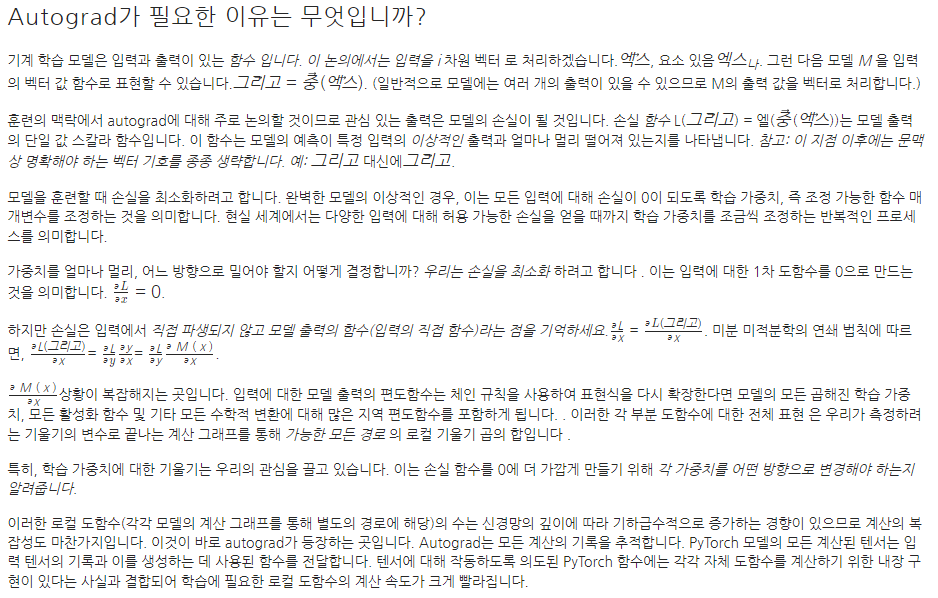

### 간단한 예
그것은 많은 이론이었습니다. 하지만 실제로 autograd를 사용하는 것은 어떤 모습일까요?

간단한 예부터 시작해 보겠습니다. 먼저 결과를 그래프로 표시하기 위해 몇 가지 가져오기를 수행합니다.

In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

다음으로, 간격에 균등한 간격의 값으로 가득 찬 입력 텐서를 생성합니다.
[
0
,
2
파이
]
[0,2p ] _, 그리고 지정합니다 requires_grad=True. (텐서를 생성하는 대부분의 함수와 마찬가지로 torch.linspace()선택적 requires_grad옵션을 허용합니다.) 이 플래그를 설정하면 이후의 모든 계산에서 autograd가 해당 계산의 출력 텐서에 계산 기록을 축적하게 됩니다.

In [3]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


다음으로 계산을 수행하고 입력을 기준으로 출력을 플롯합니다.

In [4]:
b = torch.sin(a)
# plt.plot(a.detach(), b.detach())

In [5]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


이는 grad_fn역전파 단계를 실행하고 기울기를 계산할 때 다음의 도함수를 계산해야 한다는 힌트를 제공합니다.죄
⁡
(
엑스
)
나는 n ( x ) _이 모든 텐서의 입력에 대해.

좀 더 계산을 수행해 보겠습니다

In [6]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


마지막으로 단일 요소 출력을 계산해 보겠습니다. 인수 없이 텐서를 호출하면 .backward()손실 함수를 계산할 때와 마찬가지로 호출 텐서에는 단일 요소만 포함될 것으로 예상됩니다.

In [7]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


텐서에 저장된 각 grad_fn항목을 사용하면 해당 속성이 있는 입력까지 계산을 계속 진행할 수 있습니다 next_functions . d 아래에서 이 속성을 드릴다운하면 이전의 모든 텐서에 대한 그래디언트 함수가 표시되는 것을 볼 수 있습니다 . 은(는 a.grad_fn) 로 보고되며 None, 이는 자체 기록이 없는 함수에 대한 입력임을 나타냅니다.

In [8]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x000001B95092A5F0>, 0), (None, 0))
((<SinBackward0 object at 0x000001B950928850>, 0), (None, 0))
((<AccumulateGrad object at 0x000001B95092BE20>, 0),)
()

c:

b:

a:
None


이 모든 기계를 갖춘 상태에서 파생 상품을 어떻게 얻을 수 있습니까? 출력에서 메서드를 호출 backward()하고 입력 grad속성을 확인하여 그라데이션을 검사합니다.

In [9]:
out.backward()
print(a.grad)
# plt.plot(a.detach(), a.grad.detach())

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


In [10]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

 그것이 바로 우리가 보는 것입니다.

계산의 리프 노드 만 그라데이션을 계산한다는 점에 유의하세요 . 예를 들어 시도했다면 print(c.grad)돌아올 것입니다 None. 이 간단한 예에서는 입력만 리프 노드이므로 그라데이션만 계산됩니다.

훈련중인 자동 졸업
우리는 autograd가 어떻게 작동하는지 간략하게 살펴봤습니다. 하지만 의도된 목적으로 사용될 때 어떻게 보일까요? 작은 모델을 정의하고 단일 학습 배치 후에 모델이 어떻게 변경되는지 살펴보겠습니다. 먼저 몇 가지 상수, 모델, 입력 및 출력에 대한 일부 대체 기능을 정의합니다.

In [11]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()


한 가지 주목할 만한 점은 requires_grad=True모델의 레이어를 지정하지 않는다는 것입니다. 의 하위 클래스 내에서는 torch.nn.Module학습을 위해 레이어 가중치에 대한 기울기를 추적한다고 가정합니다.

모델의 레이어를 살펴보면 가중치 값을 검사하고 아직 기울기가 계산되지 않았는지 확인할 수 있습니다.

In [12]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([-0.0220, -0.0619,  0.0180,  0.0904, -0.0842,  0.0022, -0.0295, -0.0836,
        -0.0875, -0.0149], grad_fn=<SliceBackward0>)
None


하나의 훈련 배치를 실행할 때 이것이 어떻게 변하는지 살펴보겠습니다. prediction손실 함수의 경우 우리는 와 사이의 유클리드 거리의 제곱을 사용 ideal_output하고 기본적인 확률적 경사 하강 최적화 프로그램을 사용합니다.

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(167.1102, grad_fn=<SumBackward0>)


이제 전화해서 loss.backward()무슨 일이 일어나는지 살펴보겠습니다.

In [14]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0220, -0.0619,  0.0180,  0.0904, -0.0842,  0.0022, -0.0295, -0.0836,
        -0.0875, -0.0149], grad_fn=<SliceBackward0>)
tensor([-0.8195, -0.9130, -4.4190, -0.6168, -2.4043,  0.5913,  0.1930, -0.3254,
        -5.0264, -5.0022])


각 학습 가중치에 대해 기울기가 계산되었지만 아직 최적화 프로그램을 실행하지 않았기 때문에 가중치는 변경되지 않은 상태로 유지되는 것을 볼 수 있습니다. 최적화 프로그램은 계산된 기울기를 기반으로 모델 가중치를 업데이트하는 일을 담당합니다.

In [15]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0212, -0.0610,  0.0225,  0.0910, -0.0818,  0.0016, -0.0297, -0.0832,
        -0.0824, -0.0099], grad_fn=<SliceBackward0>)
tensor([-0.8195, -0.9130, -4.4190, -0.6168, -2.4043,  0.5913,  0.1930, -0.3254,
        -5.0264, -5.0022])


layer2의 가중치가 변경된 것을 볼 수 있습니다 .

프로세스에 대한 한 가지 중요한 점은 을 호출한 후에 optimizer.step()를 호출해야 하며 optimizer.zero_grad(), 그렇지 않으면 를 실행할 때마다 loss.backward()학습 가중치의 기울기가 누적된다는 것입니다.

In [16]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none=False)

print(model.layer2.weight.grad[0][0:10])

tensor([-0.8195, -0.9130, -4.4190, -0.6168, -2.4043,  0.5913,  0.1930, -0.3254,
        -5.0264, -5.0022])
tensor([  2.9190,   2.2495, -29.5647, -14.5962,  -0.6238,   2.0412,   5.2596,
          4.7584, -12.8100, -16.6582])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


loss.backward()위의 셀을 실행한 후에 는 여러 번 실행한 후에 대부분의 그래디언트 크기가 훨씬 더 커진다는 것을 알 수 있습니다 . 다음 교육 배치를 실행하기 전에 기울기를 0으로 설정하지 않으면 기울기가 이런 방식으로 폭발하여 부정확하고 예측할 수 없는 학습 결과가 발생하게 됩니다.
### 
Autograd 끄기 및 켜기
autograd 활성화 여부를 세밀하게 제어해야 하는 상황이 있습니다. 상황에 따라 이를 수행하는 방법은 여러 가지가 있습니다.

가장 간단한 방법은 requires_grad텐서의 플래그를 직접 변경하는 것입니다.

In [17]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


위의 셀에서 우리는 이것이 autograd가 활성화된 텐서에서 파생되었기 때문에 우리가 기대하는 것(즉, 추적된 계산 기록)을 b1가지고 있음 을 알 수 있습니다. 를 사용하여 명시적으로 autograd를 끄면 계산할 때 볼 수 있듯이 계산 기록이 더 이상 추적되지 않습니다 .grad_fnaa.requires_grad = Falseb2

일시적으로 autograd를 꺼야 하는 경우 더 좋은 방법은 다음을 사용하는 것입니다 torch.no_grad()

In [18]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [20]:
# torch.no_grad()함수나 메소드 데코레이터로도 사용할 수 있습니다.

def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


torch.enable_grad()autograd가 아직 켜져 있지 않은 경우 이를 켜는 해당 컨텍스트 관리자가 있습니다 . 데코레이터로도 사용할 수 있습니다.

마지막으로, 경사 추적이 필요한 텐서가 있지만 그렇지 않은 복사본을 원할 수도 있습니다. Tensor이를 위해 객체의 메소드가 있습니다 . 이는 계산 기록에서 분리된detach() 텐서의 복사본을 생성합니다 .

In [21]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.7918, 0.7829, 0.5517, 0.4829, 0.1304], requires_grad=True)
tensor([0.7918, 0.7829, 0.5517, 0.4829, 0.1304])


위에서는 텐서의 일부를 그래프로 표시하려고 할 때 이 작업을 수행했습니다. 이는 matplotlibNumPy 배열을 입력으로 예상하고, require_grad=True인 텐서에 대해 PyTorch 텐서에서 NumPy 배열로의 암시적 변환이 활성화되지 않기 때문입니다. 분리된 복사본을 만들면 앞으로 나아갈 수 있습니다.
### 
Autograd 및 현장 운영
지금까지 이 노트북의 모든 예에서는 변수를 사용하여 계산의 중간 값을 캡처했습니다. Autograd에서는 기울기 계산을 수행하기 위해 이러한 중간 값이 필요합니다. 이러한 이유로 autograd를 사용할 때는 내부 작업을 사용할 때 주의해야 합니다. 그렇게 하면 호출에서 파생 상품을 계산하는 데 필요한 정보가 손상될 수 있습니다 backward(). PyTorch는 아래와 같이 autograd가 필요한 리프 변수에 대해 내부 작업을 시도하는 경우에도 중지됩니다.

### 오토그라드 프로필
Autograd는 계산의 모든 단계를 자세히 추적합니다. 타이밍 정보와 결합된 이러한 계산 기록은 편리한 프로파일러가 될 것이며 autograd에는 해당 기능이 내장되어 있습니다. 다음은 간단한 사용법 예입니다.

In [22]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        58.62%       4.772ms        58.62%       4.772ms       4.772us          1000  
    aten::mul        41.38%       3.368ms        41.38%       3.368ms       3.368us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 8.140ms



### 고급 주제: 더 많은 Autograd 세부정보 및 고급 API

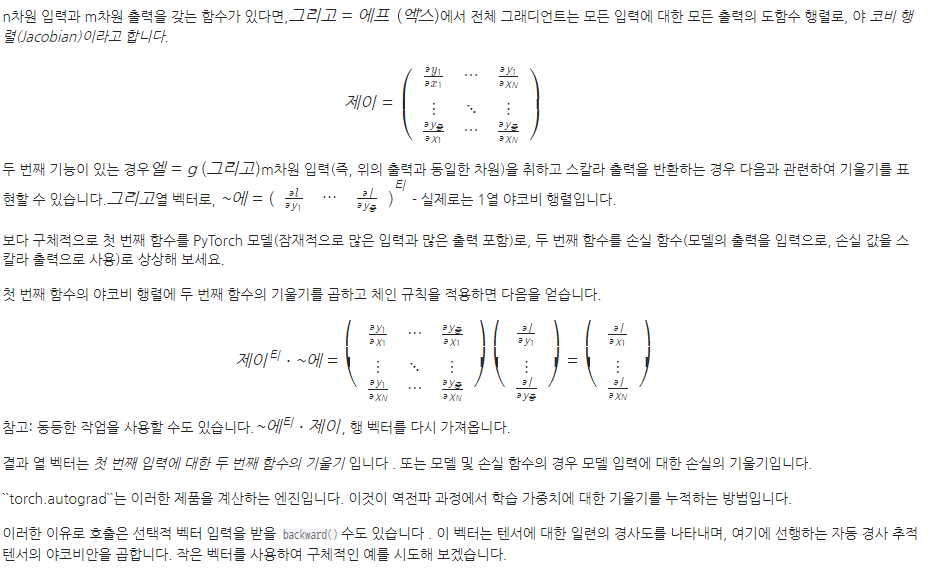bian)이라고 합니다.

In [23]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-287.7604,  468.0248, -914.1924], grad_fn=<MulBackward0>)


지금 호출하려고 하면 런타임 오류가 발생하고 스칼라 출력에 대해서만 기울기가 암시적으로y.backward() 계산 될 수 있다는 메시지가 표시됩니다 . 다차원 출력의 경우 autograd는 야코비 행렬에 곱할 수 있는 세 가지 출력에 대한 기울기를 제공할 것으로 기대합니다.



In [24]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


### 고급 API
autograd에는 중요한 미분 행렬 및 벡터 연산에 직접 액세스할 수 있는 API가 있습니다. 특히, 특정 입력에 대한 특정 함수의 야코비 행렬과 헤시안 행렬을 계산할 수 있습니다. (헤시안은 야코비안과 비슷하지만 모든 부분 2차 도함수를 표현합니다.) 또한 이러한 행렬로 벡터 곱을 구하는 방법도 제공합니다.

2개의 단일 요소 입력에 대해 평가된 간단한 함수의 야코비 행렬을 살펴보겠습니다.

In [25]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.2099]), tensor([0.2610]))


(tensor([[2.4672]]), tensor([[3.]]))

In [27]:
# 물론 고차 텐서로도 이 작업을 수행할 수 있습니다.
inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.9853, 0.4821, 0.6709]), tensor([0.7674, 0.2972, 0.9130]))


(tensor([[5.3571, 0.0000, 0.0000],
         [0.0000, 3.2390, 0.0000],
         [0.0000, 0.0000, 3.9119]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

이 torch.autograd.functional.hessian()방법은 동일하게 작동하지만(함수가 두 번 미분 가능하다고 가정) 모든 2차 도함수의 행렬을 반환합니다.

벡터를 제공하는 경우 벡터-야코비안 곱을 직접 계산하는 함수도 있습니다.

In [28]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([948.4797, 208.4162, 869.7947]),
 tensor([1.0240e+02, 1.0240e+03, 1.0240e-01]))